In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#Insert data using pandas
dt = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
#Import other necessary libraries from tensorflow and scikit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
#Using pandas to ivespecific labels to columns and rows
dt = dt.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
dt = dt.rename(columns={"v1":'label', "v2":'text'})

In [5]:
#Defining the parameters
vocab_size = 2000
emb_dim = 16
epochs = 25
max_len = 100
trunc_type = 'post'
padd_type = 'post'
oov_tok = "<OOV>"
train_size = 1000

In [6]:
print(dt.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [7]:
print(dt.isnull())

      label   text
0     False  False
1     False  False
2     False  False
3     False  False
4     False  False
...     ...    ...
5567  False  False
5568  False  False
5569  False  False
5570  False  False
5571  False  False

[5572 rows x 2 columns]


In [8]:
tg = dt["label"]
tx = dt["text"]

In [9]:
dt['label'].unique()

array(['ham', 'spam'], dtype=object)

In [10]:
label = {
    'spam': 1,
    'ham': 0
}

In [11]:
dt['label'].replace(label, inplace=True)

In [12]:
X = dt.iloc[:, 1].values
x = X.reshape(-1, 1)

In [13]:
Y = dt.iloc[:, 0].values
y = Y.reshape(-1, 1)

In [14]:
X = X.tolist()
y = y.tolist()

In [15]:
train_sen = X[train_size:]
train_lab = y[train_size:]

In [16]:
test_sen = X[0: train_size]
test_lab = y[0:train_size]

In [17]:
#Using tokinizer
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(train_sen)

In [18]:
train_seq = tokenizer.texts_to_sequences(train_sen)
train_pad = pad_sequences(train_seq, maxlen = max_len, padding = padd_type, truncating = trunc_type)

In [19]:
test_seq = tokenizer.texts_to_sequences(test_sen)
test_pad = pad_sequences(test_seq,maxlen=max_len, padding = padd_type, truncating = trunc_type)

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, emb_dim, input_length=max_len))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(24, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [21]:
Training_Sequences_padded = np.asarray(train_pad)
Testing_Sequences_padded = np.asarray(test_pad)
Training_Labels = np.asarray(train_lab)
Testing_Lables = np.asarray(test_lab)

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(Training_Sequences_padded, Training_Labels, validation_data=(Testing_Sequences_padded, Testing_Lables))

143/143 [==============================] - 188s 1s/step - loss: 0.2135 - accuracy: 0.9274 - val_loss: 0.0722 - val_accuracy: 0.9830


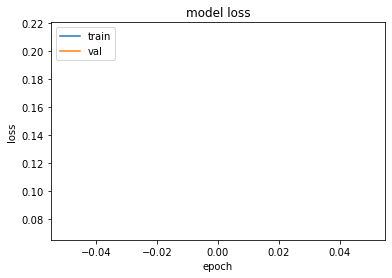

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [24]:
dt = pd.read_csv('output_spam.csv',encoding='latin-1')
dt = dt.rename(columns={"ï»¿":'labels', "text":'texts'})
dt.head()

,labels,texts
0,1,Feel Yourself That You Are Always Happy.. Slow...
1,2,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2,3,Send me yetty's number pls.
3,4,Hey so this sat are we going for the intro pil...
4,5,I got it before the new year cos yetunde said ...


In [25]:
mes = dt['texts'].astype(str)
print(mes)
pad_type='post'
samp_seq = tokenizer.texts_to_sequences(mes)
fakes_padded = pad_sequences(samp_seq, padding =pad_type, maxlen = max_len)           

classes = model.predict(fakes_padded)

0     Feel Yourself That You Are Always Happy.. Slow...
1     staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2                           Send me yetty's number pls.
3     Hey so this sat are we going for the intro pil...
4     I got it before the new year cos yetunde said ...
5     Hey we can go jazz power yoga hip hop kb and y...
6     Hey mate. Spoke to the mag people. Weâ°ÃÃ·re...
7                                Morning only i can ok.
8                                  Wat time Ã_ finish?
9                 Shant disturb u anymore... Jia you...
10    4mths half price Orange line rental & latest c...
11    Your opinion about me? 1. Over 2. Jada 3. Kusr...
12    MOON has come to color your dreams, STARS to m...
13    You are a winner U have been specially selecte...
14    Unless it's a situation where YOU GO GURL woul...
15    Awww dat is sweet! We can think of something t...
16                              Bring tat cd don forget
17    Single line with a big meaning::::: \Miss 

In [26]:
#classification of spam messages
for x in range(len(mes)):
  print(mes[x])
  print(classes[x])
  print('\n')

Feel Yourself That You Are Always Happy.. Slowly It Becomes Your Habit &amp; Finally It Becomes Part Of Your Life.. Follow It.. Happy Morning &amp; Have A Happy Day:)
[0.00362722]


staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
[0.00399829]


Send me yetty's number pls.
[0.0056323]


Hey so this sat are we going for the intro pilates only? Or the kickboxing too? 
[0.0045083]


I got it before the new year cos yetunde said she wanted to surprise you with it but when i didnt see money i returned it mid january before the  &lt;#&gt; day return period ended.
[0.00344214]


Hey we can go jazz power yoga hip hop kb and yogasana 
[0.00491156]


Hey mate. Spoke to the mag people. Weâ°ÃÃ·re on.  the is deliver by the end of the month. Deliver on the 24th sept. Talk later. 
[0.0049886]


Morning only i can ok.
[0.00361529]


Wat time Ã_ finish?
[0.00370106]


Shant disturb u anymore... Jia you...
[0.00513779]


4mths half price Orange line rental & latest camera phones 4 FREE. Had your ph